![NFL-Logo -small.png](<attachment:NFL-Logo -small.png>)
# TASK-1 Data Cleaning and Processing (NFL Play-by-Play 2009-2016)
**Task Description**

Create a Data Cleaning and Processing system to enhance data quality and usability. Utilize techniques like outlier detection, missing value imputation, and normalization for preprocessing raw data. 
Implement automation for efficient handling of large datasets. Ensure compatibility with various data formats and structures. Include error handling mechanisms to maintain data integrity. 
Provide options for data validation and visualization to assist in quality control. Prioritize scalability and performance for handling diverse data sources effectively.
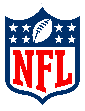

### Importing Necessary Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',200)

### Reading the data

In [60]:
df = pd.read_csv('NFL Play by Play 2009-2016 (v3).csv')

##### Data Exploration

In [61]:
#checking the data
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,NaN,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,NaN,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,NaN,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [62]:
#checking info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


In [63]:
#describing the data
df.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,3.624470e+05,362447.000000,362447.000000,308229.000000,362447.000000,362259.000000,362073.000000,361724.000000,361724.000000,362447.000000,362447.000000,361724.000000,336850.000000,362447.0,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,7919.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,338765.000000,338765.000000,340472.000000,338765.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362299.000000,362299.000000,362299.000000,362299.000000,362299.000000,362299.000000,362299.000000,362447.000000,362447.000000,362299.000000,362125.000000,141806.000000,141713.000000,340504.000000,340504.000000,339087.000000,339087.000000,340454.000000,357630.000000,141709.000000,141491.000000,362447.000000
mean,2.012664e+09,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649,28.413542,48.616807,7.305236,25.907895,0.049422,0.291183,1.0,5.034595,0.072171,0.029166,0.000392,0.001368,0.412882,3.271648,1.253747,0.052355,0.011215,0.296452,0.248566,37.379341,0.014272,0.027094,0.008227,0.071969,0.608792,10.257134,11.474904,-1.191217,7.830319,0.041134,2.519651,2.540589,2.514224,2.520297,2.493382,0.127559,0.094798,0.002514,0.140266,0.243912,0.002635,0.296208,0.024350,0.000690,1.564915,0.020177,0.526933,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.002163,0.015209,-0.010492,2012.522071
std,2.292258e+06,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486,13.002355,25.161965,4.863445,24.859579,0.216747,0.454308,0.0,9.144627,0.258770,0.168271,0.019790,0.036968,0.492353,7.511632,4.199049,0.222743,0.105308,0.456693,0.432182,10.306545,0.118612,0.162356,0.090331,0.258437,2.607951,9.460576,9.946084,10.791503,7.477384,0.198601,0.778920,0.760446,0.781086,0.780078,0.800497,0.199399,0.072123,0.003458,0.110672,0.158945,0.001462,0.167838,0.152240,0.018059,1.752432,1.331720,1.392090,1.972964,0.286415,0.286468,0.288647,0.288694,0.288207,0.045326,0.056422,0.067972,2.290084
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,-87.000000,0.000000,0.000000,1.0,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-70.000000,-81.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,0.000000,0.000000,0.000000,-3.000000,-1.000000,-3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.836488,-13.494136,-12.849594,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,5.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,-7.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.002803,0.034652,0.000104,0.039944,0.152578,0.001890,0.191605,0.000000,0.000000,0.323526,-0.598006,-0.498824,-0.964562,0.323129,0.230595,0.319464,0.226

In [64]:
#checking the shape of the data
df.shape

(362447, 102)

In [65]:
#checking the datatypes in the dataframe
df.dtypes

Date                            object
GameID                           int64
Drive                            int64
qtr                              int64
down                           float64
time                            object
TimeUnder                        int64
TimeSecs                       float64
PlayTimeDiff                   float64
SideofField                     object
yrdln                          float64
yrdline100                     float64
ydstogo                          int64
ydsnet                           int64
GoalToGo                       float64
FirstDown                      float64
posteam                         object
DefensiveTeam                   object
desc                            object
PlayAttempted                    int64
Yards.Gained                     int64
sp                               int64
Touchdown                        int64
ExPointResult                   object
TwoPointConv                    object
DefTwoPoint              

### DATA CLEANING AND PROCESSING


#### Checking for missing values

In [66]:
overall_missing_percentage = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
print(f"Overall Missing Percentage: {overall_missing_percentage:.2f}%")

Overall Missing Percentage: 27.65%


**We have 27.65% missing values in the dataframe**

In [67]:
#checking the missing values %
100*df.isnull().mean().sort_values(ascending = False)

DefTwoPoint                    99.996137
BlockingPlayer                 99.970754
TwoPointConv                   99.854324
ChalReplayResult               99.180294
RecFumbPlayer                  98.914600
RecFumbTeam                    98.914600
Interceptor                    98.879836
FieldGoalDistance              97.815129
FieldGoalResult                97.788366
ExPointResult                  97.503635
PenaltyType                    95.972377
Timeout_Team                   95.886571
ReturnResult                   95.613152
PuntResult                     94.513129
Returner                       93.678524
PenalizedPlayer                93.112372
PenalizedTeam                  92.803086
Tackler2                       87.749381
RunGap                         78.523205
RunLocation                    70.682610
Rusher                         70.425193
Rusher_ID                      69.572931
Receiver_ID                    61.323449
yacWPA                         60.962292
airWPA          

**After analysing cohorts of columns by % of missing values I assumed, that removing them won't affect my further calculations**

In [68]:
#Finding the columns with more than 40% missing values and assigning them into a new list
cutoff=40
cols_to_drop=list(df.columns[100*df.isnull().mean()>cutoff])
# Print the list of columns to be dropped
cols_to_drop

['ExPointResult',
 'TwoPointConv',
 'DefTwoPoint',
 'PuntResult',
 'Passer',
 'Passer_ID',
 'PassOutcome',
 'PassLength',
 'PassLocation',
 'Interceptor',
 'Rusher',
 'Rusher_ID',
 'RunLocation',
 'RunGap',
 'Receiver',
 'Receiver_ID',
 'ReturnResult',
 'Returner',
 'BlockingPlayer',
 'Tackler1',
 'Tackler2',
 'FieldGoalResult',
 'FieldGoalDistance',
 'RecFumbTeam',
 'RecFumbPlayer',
 'ChalReplayResult',
 'PenalizedTeam',
 'PenaltyType',
 'PenalizedPlayer',
 'Timeout_Team',
 'airEPA',
 'yacEPA',
 'airWPA',
 'yacWPA']

#### Dropping the columns with more than 40% missing data
- I've identified that 34 columns in the 'df' dataframe contain more than 40% missing values.  To enhance the stability and efficiency of our analysis and to derive meaningful insights from the data, I have decided to remove these columns from the
'df' dataframe.

In [69]:
#dropping the columns 
df=df.drop(cols_to_drop,axis=1)

In [70]:
#checking the shape of the data after dropping the columns
df.shape

(362447, 68)

*Now, total columns reduced from 102 to 68*

In [71]:
#checking again for missing value percentage
check_null=(df.isna().sum()/len(df)*100).sort_values(ascending = False)
check_null

down                           14.958877
FirstDown                       7.062274
AbsScoreDiff                    6.533921
PosTeamScore                    6.533921
DefTeamScore                    6.533921
Home_WP_post                    6.445080
Away_WP_post                    6.445080
Win_Prob                        6.067922
DefensiveTeam                   6.064059
posteam                         6.064059
ScoreDiff                       6.062955
Home_WP_pre                     6.054127
Away_WP_pre                     6.054127
WPA                             1.329022
GoalToGo                        0.199477
yrdline100                      0.199477
yrdln                           0.199477
SideofField                     0.124156
PlayTimeDiff                    0.103188
EPA                             0.088841
TimeSecs                        0.051870
time                            0.051870
Opp_Touchdown_Prob              0.040834
No_Score_Prob                   0.040834
Opp_Field_Goal_P

### Further cleaning the dataset

#### Dropping the duplicates

In [72]:
#checking for duplicates
df = df.drop_duplicates()

In [73]:
duplicates = df[df.duplicated()]
num_duplicates = duplicates.shape[0]
print("Number of Duplicate Rows", num_duplicates)

Number of Duplicate Rows 0


In [74]:
#checking overall missing percentage again
overall_missing_percentage = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
print(f"Overall Missing Percentage: {overall_missing_percentage:.2f}%")

Overall Missing Percentage: 1.38%


### Dividing the rest of the columns in two categories:

- Grouped the columns into two categories
1. Cat_col : Categorical Columns
2. Num_col : Numerical Columns

In [75]:
Cat_col= sorted(df.columns[df.nunique()<60])
Cat_col

['AbsScoreDiff',
 'Accepted.Penalty',
 'AwayTeam',
 'AwayTimeouts_Remaining_Post',
 'AwayTimeouts_Remaining_Pre',
 'Challenge.Replay',
 'DefensiveTeam',
 'Drive',
 'ExPoint_Prob',
 'FirstDown',
 'Fumble',
 'GoalToGo',
 'HomeTeam',
 'HomeTimeouts_Remaining_Post',
 'HomeTimeouts_Remaining_Pre',
 'InterceptionThrown',
 'Onsidekick',
 'PassAttempt',
 'Penalty.Yards',
 'PlayAttempted',
 'PlayType',
 'QBHit',
 'Reception',
 'RushAttempt',
 'Sack',
 'Safety',
 'Season',
 'SideofField',
 'TimeUnder',
 'Timeout_Indicator',
 'Touchdown',
 'TwoPoint_Prob',
 'down',
 'posteam',
 'posteam_timeouts_pre',
 'qtr',
 'sp',
 'ydstogo',
 'yrdln']

In [76]:
Num_col=sorted(df.columns[df.nunique()>60])
Num_col

['AirYards',
 'Away_WP_post',
 'Away_WP_pre',
 'Date',
 'EPA',
 'ExpPts',
 'Field_Goal_Prob',
 'GameID',
 'Home_WP_post',
 'Home_WP_pre',
 'No_Score_Prob',
 'Opp_Field_Goal_Prob',
 'Opp_Safety_Prob',
 'Opp_Touchdown_Prob',
 'PlayTimeDiff',
 'PosTeamScore',
 'Safety_Prob',
 'ScoreDiff',
 'TimeSecs',
 'Touchdown_Prob',
 'WPA',
 'Win_Prob',
 'Yards.Gained',
 'YardsAfterCatch',
 'desc',
 'time',
 'ydsnet',
 'yrdline100']

#### Imputing missing values

- The imputation strategy varies for numerical and categorical columns.
- For numerical columns, utilizing the median or mean for imputation is common. 
- Imputing the median value is considered a superior approach compared to using the mean, as the median is less sensitive to outliers, resulting in a more robust imputation method.
- For categorical columns, mode is the best method for imputation

*Note*
- For Num_col there are two columns whose dtypes are different.
- 'Date' 'time' & 'desc' columns cannot be imputed, we can remove it from the Cont_col by making a seperate list.

In [77]:
Num_col = ['AirYards','Away_WP_post','Away_WP_pre','EPA','ExpPts','Field_Goal_Prob','GameID','Home_WP_post','Home_WP_pre','No_Score_Prob',
 'Opp_Field_Goal_Prob','Opp_Safety_Prob','Opp_Touchdown_Prob','PlayTimeDiff','PosTeamScore','Safety_Prob','ScoreDiff','TimeSecs','Touchdown_Prob',
 'WPA','Win_Prob','Yards.Gained','YardsAfterCatch','ydsnet','yrdline100']

**Defining a function to impute missing values in categorical columns**

In [78]:
#Impute the Cat_col with mode
def impute_missing_values(df, cat_columns):
    for col in cat_columns:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
    return df

In [79]:
df1 = impute_missing_values(df, Cat_col)
df1.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season
0,2009-09-10,2009091000,1,1,1.0,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,0.0,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,0,0,Kickoff,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,0,0,Pass,1,-3,8,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,0,0,Run,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,0,0,Pass,1,34,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,0,0,Punt,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,2009


*We have not imputed the numerical columns because it can differ the outcomes*

In [80]:
#checking overall missing percentage again
overall_missing_percentage = (df1.isnull().sum().sum() / (len(df1) * len(df1.columns))) * 100
print(f"Overall Missing Percentage: {overall_missing_percentage:.2f}%")

Overall Missing Percentage: 0.77%


*Thee missing percentage is 0.77% which can be considered negligible*

#### Handling Outliers

In [81]:
len(Num_col)

25

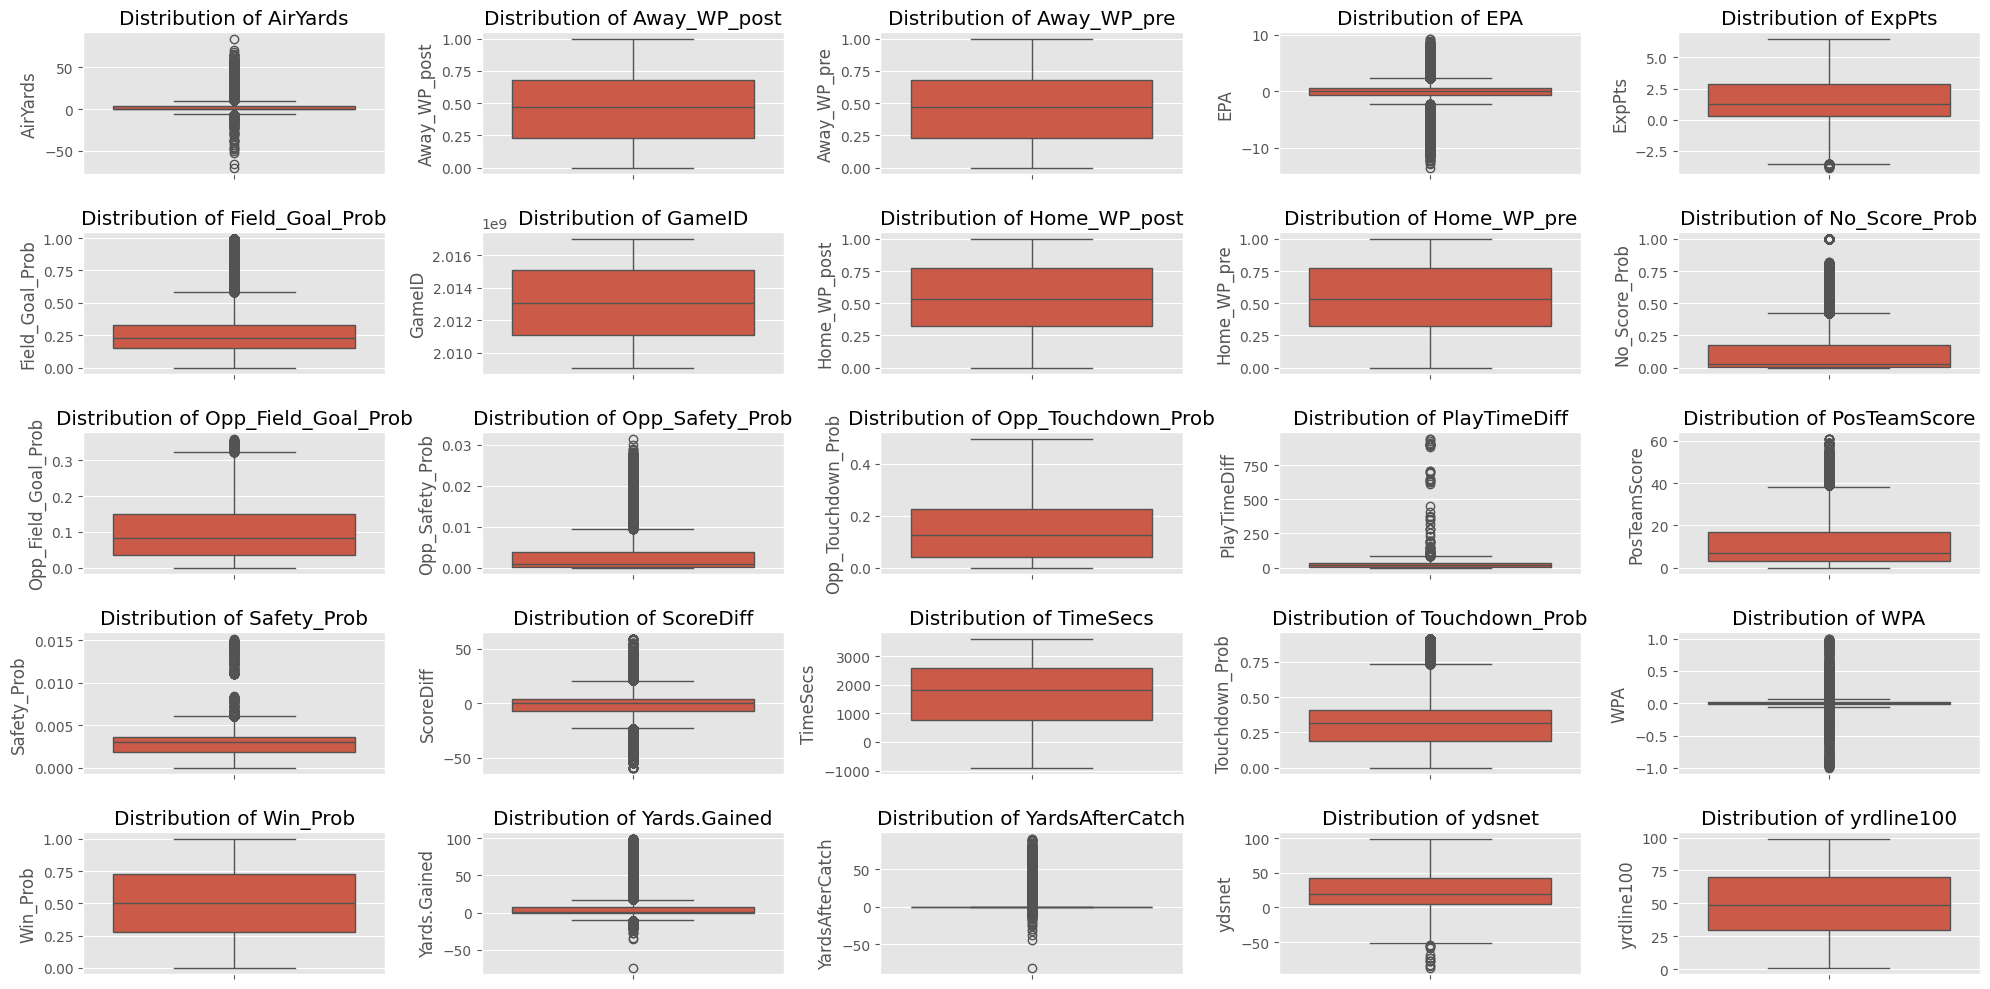

In [82]:
#checking outliers in the numerical column
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
for i, col in enumerate(Num_col, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(df1[col].dropna())
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

#### Outlier Treatment
- Understand the domain and context of the data to decide if an outlier is a true anomaly or a significant data point
- Remove outliers from the dataset only when outliers are due to data entry errors or measurement errors

**Here there are no errors in the entry so we are not treating the outliers**

### Further analysis for EDA

- In this data they have game id, which is meassuring score over and over again for the same game, that's why there are so many rows.
- Look at the code below and you see, that 1 game can have 100-300 rows

In [83]:
#checking the value counts of GameID
game_id_value_counts = df1['GameID'].value_counts()
print(game_id_value_counts)

GameID
2011120406    272
2016112709    232
2016103000    231
2012112200    229
2013112403    229
             ... 
2015092705    146
2012110100    146
2009122706    145
2013090801    145
2013120806    125
Name: count, Length: 2048, dtype: int64


In [84]:
df1.tail()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season
362442,2017-01-01,2017010102,20,4,1.0,00:22,1,22.0,6.0,GB,35.0,35.0,10,35,0.0,0.0,DET,GB,(:22) (Shotgun) M.Stafford pass deep middle to...,1,35,1,1,0,0,Pass,1,35,0,0,0,0,1,0,0,0,0,0,17.0,31.0,-14.0,14.0,DET,GB,0,0,0,0,0,0,0.432210,0.022742,0.000105,0.016372,0.283459,0.000626,0.244487,0.000000,0.0,2.379997,4.620003,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,2016
362443,2017-01-01,2017010102,20,4,1.0,00:13,1,13.0,9.0,GB,15.0,15.0,0,35,0.0,0.0,DET,GB,"M.Prater extra point is GOOD, Center-D.Muhlbac...",1,0,1,0,0,0,Extra Point,0,0,0,0,0,0,0,0,0,0,0,0,23.0,31.0,-8.0,8.0,DET,GB,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.931115,0.0,0.931115,0.068885,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,2016
362444,2017-01-01,2017010102,21,4,1.0,00:13,1,13.0,0.0,DET,35.0,35.0,0,0,0.0,0.0,GB,DET,S.Martin kicks onside 11 yards from DET 35 to ...,1,0,0,0,0,1,Kickoff,0,0,0,0,0,0,0,0,0,0,0,0,31.0,24.0,7.0,7.0,DET,GB,0,0,0,0,0,0,0.723273,0.039083,0.002014,0.028291,0.109291,0.000420,0.097628,0.000000,0.0,0.692792,-0.692792,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,2016
362445,2017-01-01,2017010102,21,4,1.0,00:12,1,12.0,1.0,DET,46.0,46.0,10,-1,0.0,0.0,GB,DET,(:12) A.Rodgers kneels to DET 47 for -1 yards.,1,-1,0,0,0,0,QB Kneel,0,0,0,0,0,0,0,0,0,0,0,0,31.0,24.0,7.0,7.0,DET,GB,0,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,2016
362446,2017-01-01,2017010102,21,4,1.0,00:00,0,0.0,12.0,DET,46.0,46.0,0,-1,0.0,0.0,GB,DET,END GAME,1,0,0,0,0,0,End of Game,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,7.0,0.0,DET,GB,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.934245,0.000000,2016


Checking the END GAME gameID ie: 2017010102

In [85]:
#selecting one gameID with final score for filtering rows
filtered_rows = df1[df1['GameID'] == 2017010102]
print(filtered_rows[['HomeTeam', 'AwayTeam', 'Home_WP_post', 'Away_WP_post', 'PosTeamScore', 'DefTeamScore']])


       HomeTeam AwayTeam  Home_WP_post  Away_WP_post  PosTeamScore  \
362257      DET       GB      0.500007      0.499993           0.0   
362258      DET       GB      0.510737      0.489263           0.0   
362259      DET       GB      0.484459      0.515541           0.0   
362260      DET       GB      0.430028      0.569972           0.0   
362261      DET       GB      0.496597      0.503403           0.0   
362262      DET       GB      0.496970      0.503030           0.0   
362263      DET       GB      0.472480      0.527520           0.0   
362264      DET       GB      0.438305      0.561695           0.0   
362265      DET       GB      0.434788      0.565212           0.0   
362266      DET       GB      0.484710      0.515290           0.0   
362267      DET       GB      0.532353      0.467647           0.0   
362268      DET       GB      0.479969      0.520031           0.0   
362269      DET       GB      0.518323      0.481677           0.0   
362270      DET     

#### Getting Rid of Unnecessary rows 

In [86]:
# Getting rid of extra rows, so we can have rows only with final score in each game
columns_to_keep = ['GameID', 'Date', 'HomeTeam', 'AwayTeam', 'Home_WP_post', 'Away_WP_post','PosTeamScore','DefTeamScore', 
                   'WPA','ScoreDiff','Season','Win_Prob']
final_scores = df1.groupby('GameID')[columns_to_keep].tail(1)

print(final_scores)

            GameID        Date HomeTeam AwayTeam  Home_WP_post  Away_WP_post  \
177     2009091000  2009-09-10      PIT      TEN           NaN           NaN   
349     2009091304  2009-09-13      CLE      MIN           0.0           1.0   
531     2009091307  2009-09-13       NO      DET           1.0           0.0   
702     2009091308  2009-09-13       TB      DAL           0.0           1.0   
865     2009091305  2009-09-13      HOU      NYJ           0.0           1.0   
...            ...         ...      ...      ...           ...           ...   
361723  2017010112  2017-01-01      DEN      OAK           1.0           0.0   
361889  2017010111  2017-01-01      WAS      NYG           NaN           NaN   
362062  2017010115  2017-01-01       SF      SEA           0.0           1.0   
362256  2017010100  2017-01-01      ATL       NO           1.0           0.0   
362446  2017010102  2017-01-01      DET       GB           0.0           1.0   

        PosTeamScore  DefTeamScore  WPA

In [87]:
final_scores.sample(15)

,GameID,Date,HomeTeam,AwayTeam,Home_WP_post,Away_WP_post,PosTeamScore,DefTeamScore,WPA,ScoreDiff,Season,Win_Prob
147787,2012100704,2012-10-07,MIN,TEN,1.0,0.0,NaN,NaN,0.0,-23.0,2012,2.220446e-16
147081,2012100707,2012-10-07,CAR,SEA,0.0,1.0,NaN,NaN,0.0,5.0,2012,9.992801e-01
264409,2014121405,2014-12-14,DET,MIN,NaN,NaN,14.0,16.0,NaN,-2.0,2014,1.672906e-03
321225,2016091801,2016-09-18,CLE,BAL,0.0,1.0,NaN,NaN,0.0,3.0,2016,9.993223e-01
241400,2014101300,2014-10-13,STL,SF,0.0,1.0,NaN,NaN,0.0,-13.0,2014,4.995335e-08
100089,2011100212,2011-10-02,OAK,NE,0.0,1.0,NaN,NaN,0.0,12.0,2011,1.065373e-06
353065,2016121110,2016-12-11,SF,NYJ,NaN,NaN,17.0,17.0,NaN,0.0,2016,8.497178e-01
93198,2011091806,2011-09-18,MIN,TB,NaN,NaN,20.0,24.0,NaN,-4.0,2011,5.998131e-02
27175,2009112210,2009-11-22,DEN,SD,0.0,1.0,NaN,NaN,0.0,-29.0,2009,2.220446e-16
113092,2011111308,2011-11-13,ATL,NO,NaN,NaN,23.0,23.0,NaN,0.0,2011,9.787563e-01


##### Calculating points by scores in the game

In [88]:
# Creating function to calculate points by scores in the game

def calculate_points(row):
    if row['Home_WP_post'] > row['Away_WP_post']:
        return 2, 0 
    elif row['Home_WP_post'] < row['Away_WP_post']:
        return 0, 2  
    else:
        if row['PosTeamScore'] > row['DefTeamScore']:
            return 2, 0
        elif row['PosTeamScore'] < row['DefTeamScore']:
            return 0, 2
        else:
            return 1, 1 

final_scores['home_team_points'], final_scores['away_team_points'] = zip(*final_scores.apply(calculate_points, axis=1))

In [89]:
filtered_games = final_scores[(final_scores['home_team_points'] == 1) | (final_scores['away_team_points'] == 1)]
filtered_games.head(15)

,GameID,Date,HomeTeam,AwayTeam,Home_WP_post,Away_WP_post,PosTeamScore,DefTeamScore,WPA,ScoreDiff,Season,Win_Prob,home_team_points,away_team_points
177,2009091000,2009-09-10,PIT,TEN,NaN,NaN,10.0,10.0,NaN,0.0,2009,0.955527,1,1
4724,2009092009,2009-09-20,BUF,TB,NaN,NaN,NaN,NaN,0.0,NaN,2009,NaN,1,1
7305,2009092709,2009-09-27,BUF,NO,NaN,NaN,NaN,NaN,0.0,NaN,2009,NaN,1,1
11313,2009101104,2009-10-11,KC,DAL,NaN,NaN,20.0,20.0,NaN,0.0,2009,0.561189,1,1
12674,2009101110,2009-10-11,DEN,NE,NaN,NaN,17.0,17.0,NaN,0.0,2009,0.881082,1,1
15307,2009101811,2009-10-18,NYJ,BUF,NaN,NaN,13.0,13.0,NaN,0.0,2009,0.780864,1,1
18223,2009110101,2009-11-01,BUF,HOU,NaN,NaN,NaN,NaN,0.0,NaN,2009,NaN,1,1
25799,2009112207,2009-11-22,NYG,ATL,NaN,NaN,31.0,31.0,NaN,0.0,2009,0.929026,1,1
26145,2009112205,2009-11-22,KC,PIT,NaN,NaN,24.0,24.0,NaN,0.0,2009,0.990219,1,1
26665,2009112202,2009-11-22,DET,CLE,NaN,NaN,37.0,37.0,NaN,0.0,2009,0.803443,1,1


#### Which Team is BEST ?

In [90]:
team_points = {}
for index, row in final_scores.iterrows():
    home_team = row['HomeTeam']
    if home_team in team_points:
        team_points[home_team] += row['home_team_points']
    else:
        team_points[home_team] = row['home_team_points']
    
    away_team = row['AwayTeam']
    if away_team in team_points:
        team_points[away_team] += row['away_team_points']
    else:
        team_points[away_team] = row['away_team_points']

total_points_df = pd.DataFrame(list(team_points.items()), columns=['Team', 'Total_Points'])
total_points_df = total_points_df.sort_values(by='Total_Points', ascending=False)


print(total_points_df)

   Team  Total_Points
28   NE           187
26   GB           182
13  DEN           159
22  SEA           158
4    NO           155
18  ATL           152
0   PIT           150
10  IND           149
12  CIN           148
16  BAL           143
15  PHI           135
8   HOU           134
14  CAR           133
21   SF           133
7   DAL           132
20  ARI           132
31   SD           131
24  NYG           130
27  CHI           123
17   KC           121
19  MIA           121
3   MIN           121
9   NYJ           116
30  OAK           108
5   DET           106
1   TEN           102
25  WAS           100
29  BUF            98
6    TB            95
23  STL            80
11  JAC            75
2   CLE            72
32   LA            10
33  JAX             5


### Total Points Scored by Teams

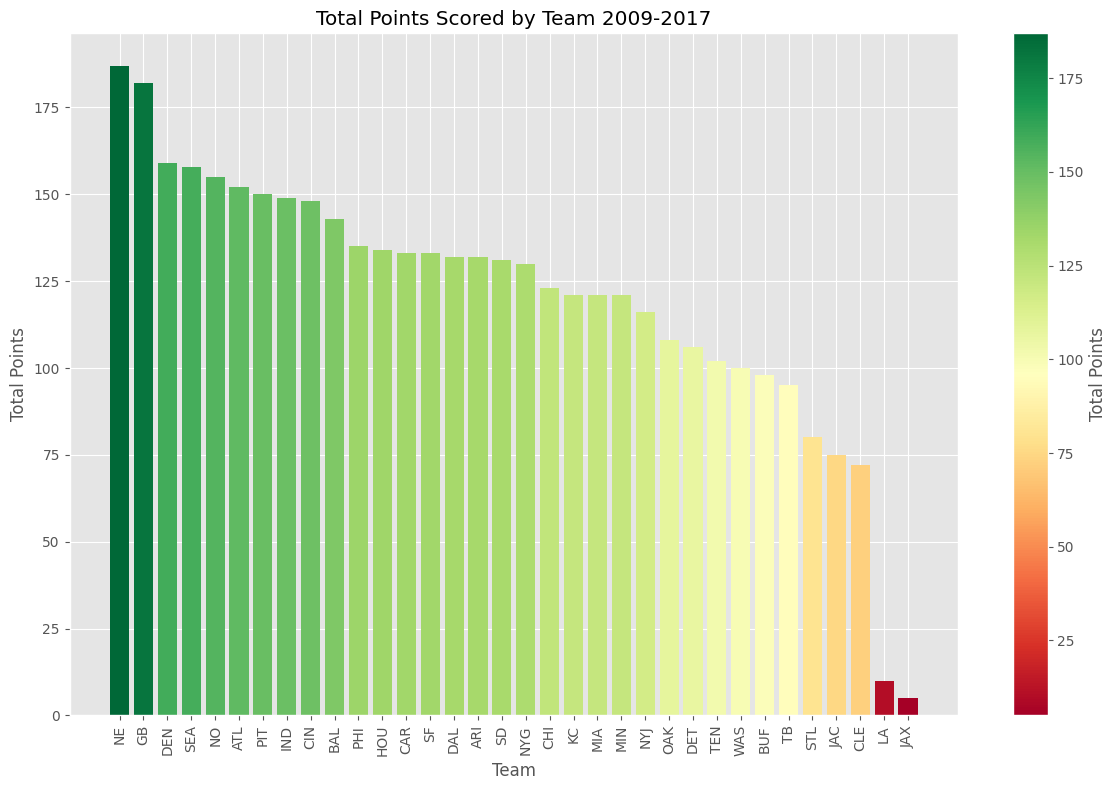

In [91]:
warnings.filterwarnings("ignore")

total_points_df = total_points_df.sort_values(by='Total_Points', ascending=False)

cmap = plt.cm.RdYlGn 
norm = plt.Normalize(total_points_df['Total_Points'].min(), total_points_df['Total_Points'].max())

plt.figure(figsize=(12, 8))
bars = plt.bar(total_points_df['Team'], total_points_df['Total_Points'], color=cmap(norm(total_points_df['Total_Points'])))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Total Points')

plt.xlabel('Team')
plt.ylabel('Total Points')
plt.title('Total Points Scored by Team 2009-2017')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights:**

Top Performers:
- New England (NE) leads with 187 total points, followed closely by Green Bay (GB) with 182 points. This indicates that these teams have consistently performed well in terms of scoring over the analyzed period.
- Denver (DEN), Seattle (SEA), and New Orleans (NO) also have high total points, suggesting strong offensive capabilities and likely successful seasons.

Middle Performers:
- Teams like Pittsburgh (PIT), Indianapolis (IND), Cincinnati (CIN), and Baltimore (BAL) fall in the middle range with total points between 143 and 150. These teams have shown solid performance but may not be as dominant as the top teams.
- Teams such as Philadelphia (PHI), Houston (HOU), San Francisco (SF), and Carolina (CAR) have total points in the 130-135 range, indicating a relatively balanced and competitive field in the mid-tier.

Lower Performers:
- Teams like Tennessee (TEN), Washington (WAS), Buffalo (BUF), and Tampa Bay (TB) have total points below 100, suggesting they have struggled to score consistently.
St. Louis (STL), Jacksonville (JAC), Cleveland (CLE), and Los Angeles (LA) are among the lowest-scoring teams, indicating significant challenges in their offensive performance.
- Los Angeles (LA) with 10 points and Jacksonville (JAX) with 5 points are outliers at the very bottom, which might indicate particularly poor seasons or specific issues affecting their performance during the analyzed period.

### Yearwise Points of Each Team

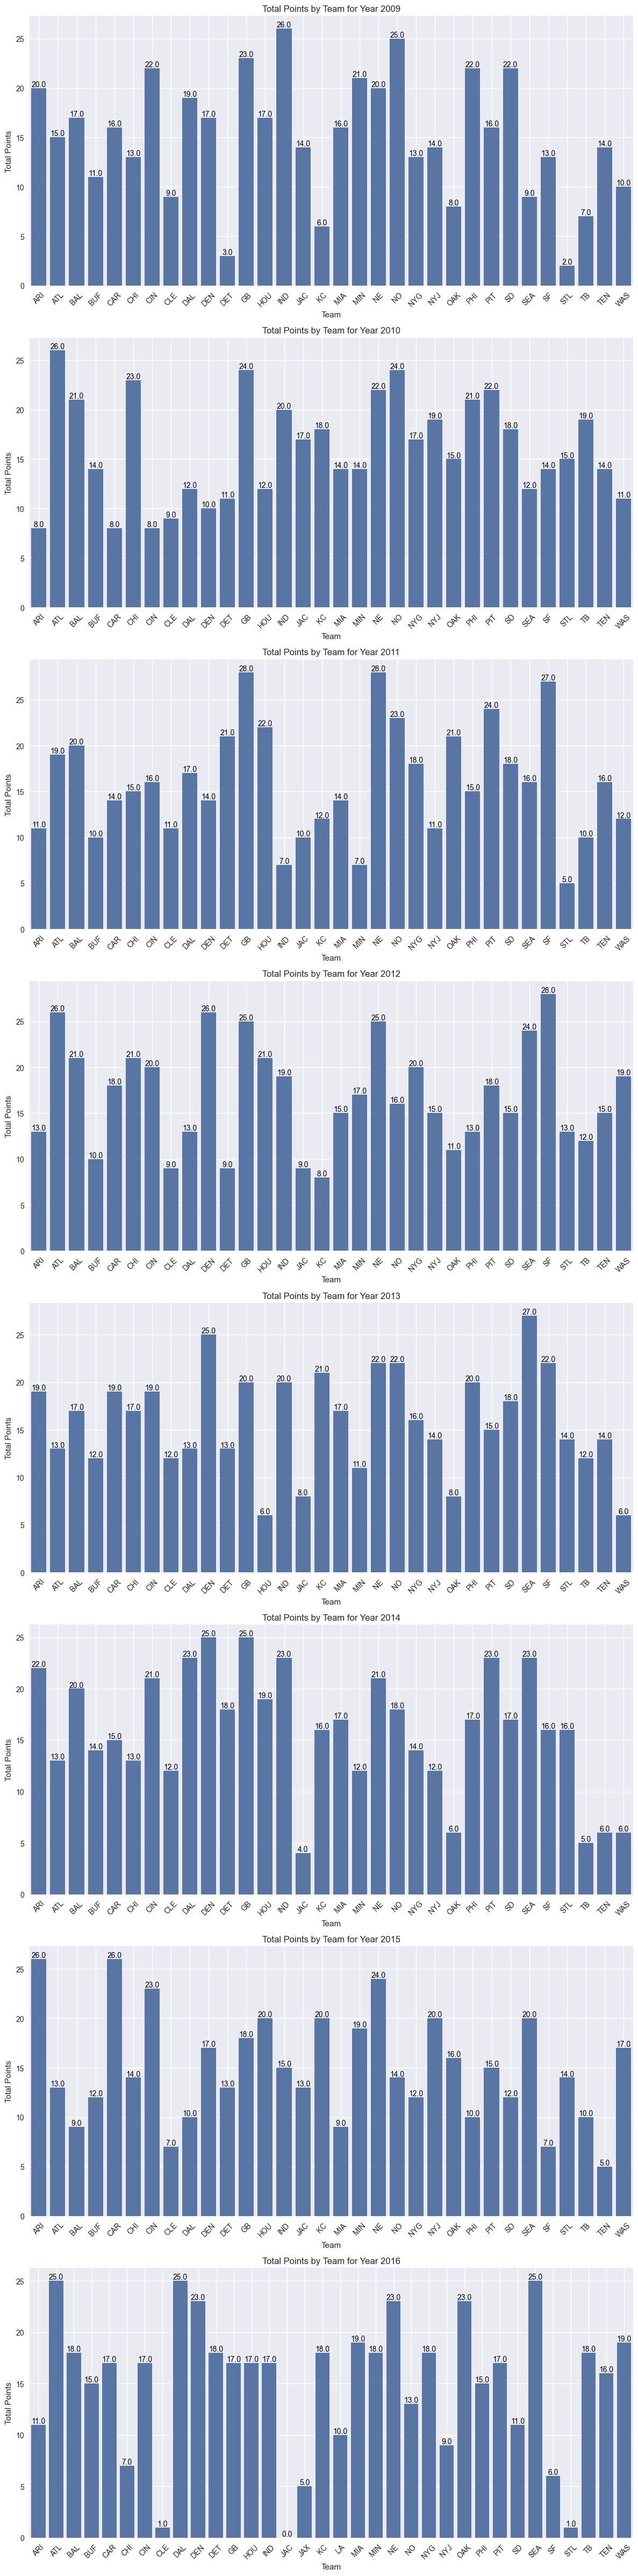

In [96]:
# Calculate total points for each team by each year

plt.style.use('seaborn-v0_8')
all_points_data = []
for index, row in final_scores.iterrows():
    all_points_data.extend([(row['Date'][:4], row['HomeTeam'], row['home_team_points']), 
                            (row['Date'][:4], row['AwayTeam'], row['away_team_points'])])

df = pd.DataFrame(all_points_data, columns=['Year', 'Team', 'Points'])
df = df.groupby(['Year', 'Team'])['Points'].sum().reset_index()

# Filter out the year 2017
df = df[df['Year'] != '2017']

# Get unique years except 2017
years = df['Year'].unique()
num_years = len(years)

# Create subplots
fig, axes = plt.subplots(nrows=num_years, ncols=1, figsize=(12, 6 * num_years))

# Plot each year in a subplot
for i, year in enumerate(years):
    df_year = df[df['Year'] == year]
    ax = axes[i] if num_years > 1 else axes
    sns.barplot(data=df_year, x='Team', y='Points', ax=ax)
    ax.set_title(f'Total Points by Team for Year {year}')
    ax.set_xlabel('Team')
    ax.set_ylabel('Total Points')
    ax.grid(True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

plt.tight_layout()
plt.show()

### Win % Comparison (Home and Away)

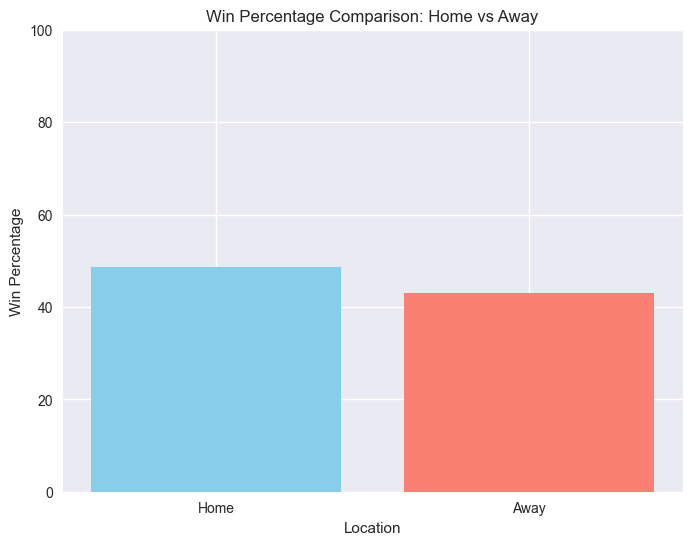

In [97]:
home_wins = final_scores[final_scores['home_team_points'] > final_scores['away_team_points']].shape[0]
away_wins = final_scores[final_scores['away_team_points'] > final_scores['home_team_points']].shape[0]

total_games = len(final_scores)

home_win_percentage = (home_wins / total_games) * 100
away_win_percentage = (away_wins / total_games) * 100

win_data = pd.DataFrame({
    'Location': ['Home', 'Away'],
    'Win Percentage': [home_win_percentage, away_win_percentage]
})

plt.figure(figsize=(8, 6))
plt.bar(win_data['Location'], win_data['Win Percentage'], color=['skyblue', 'salmon'])
plt.xlabel('Location')
plt.ylabel('Win Percentage')
plt.title('Win Percentage Comparison: Home vs Away')
plt.ylim(0, 100) 
plt.show()

**Insights**

The plot indicates that the home team generally has a higher win percentage compared to the away team. This is a well-documented phenomenon in American football, often referred to as the "home field advantage." Several factors might contribute to this trend:

- The home team plays in their own stadium, where they are familiar with the field conditions, crowd noise, and other environmental factors.
- The away team has to travel, which can be exhausting and disruptive to their routine.
- Home teams typically enjoy greater fan support than away teams, creating a more positive and energizing atmosphere.

##### Exporting the Cleaned data for data validation and visualization to assist in quality control

In [98]:
filtered_games.to_csv("cleaned-data.csv")